In [1]:
cd C:\rr_project\cyclone_classification

C:\rr_project\cyclone_classification


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.style.use("seaborn-dark")
np.random.seed(42)

In [3]:
pacific = pd.read_csv("pacific.csv").drop(['ID', 'Name'], axis=1)
pacific.head()

,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,19490611,0,,TS,20.2N,106.3W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,19490611,600,,TS,20.2N,106.4W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,19490611,1200,,TS,20.2N,106.7W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,19490611,1800,,TS,20.3N,107.7W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,19490612,0,,TS,20.4N,108.6W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [5]:
pacific.columns

Index(['Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude',
       'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')

In [6]:
pacific.shape

(26137, 20)

In [7]:
#check for unique status
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)
pacific.Status.unique()

array([' TS', ' HU', ' TD', ' EX', ' LO', ' ET', ' DB', ' SD', ' SS',
       ' PT', ' ST', ' HU '], dtype=object)

 TS     10076
 TD      6965
 HU      6765
 LO      1828
 DB       217
 ET       152
 EX       110
 SS         7
 ST         6
 PT         6
 SD         4
 HU         1
Name: Status, dtype: int64


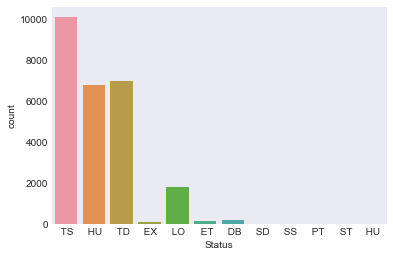

In [8]:
sns.countplot(x='Status', data=pacific)
print(pacific.Status.value_counts())

In [9]:
pacific.loc[:,'Status'] = pacific['Status'].str.strip()

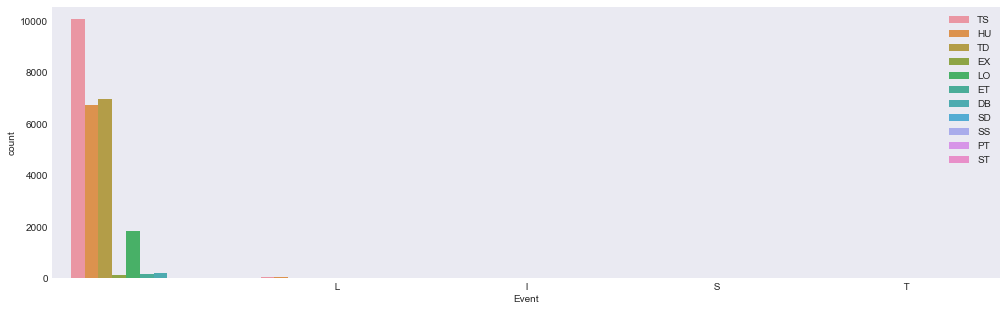

In [10]:
plt.figure(figsize=(17,5))
sns.countplot(pacific.Event, hue=pacific.Status)
plt.legend(loc='upper right')

In [11]:
pacific.Event.unique()

array(['  ', ' L', ' I', ' S', ' T'], dtype=object)

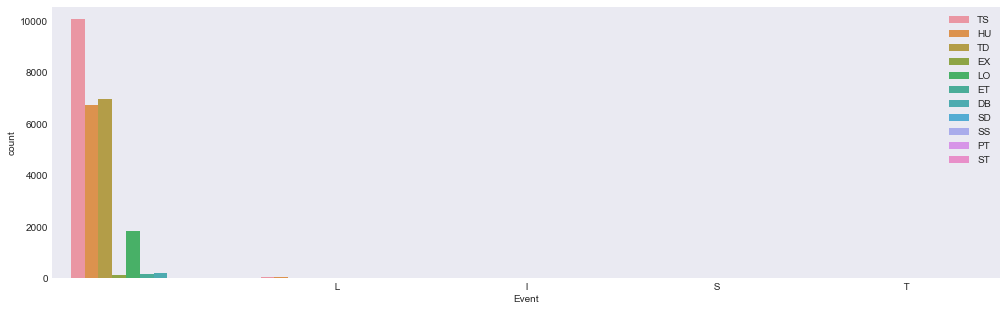

In [12]:
plt.figure(figsize=(17,5))
sns.countplot(pacific.Event, hue=pacific.Status)
plt.legend(loc='upper right')

In [13]:
pacific.Time.unique()

array([   0,  600, 1200, 1800,  400, 2300,  500, 1900, 1000, 2000,  300,
       2030, 1700, 1300,  800,  900,  100, 1500,  630, 1100, 2100,  700,
       1630,  930,  200, 1915, 1400, 2230, 2200, 1600, 1950,  445,  915,
       1030, 1115, 1345], dtype=int64)

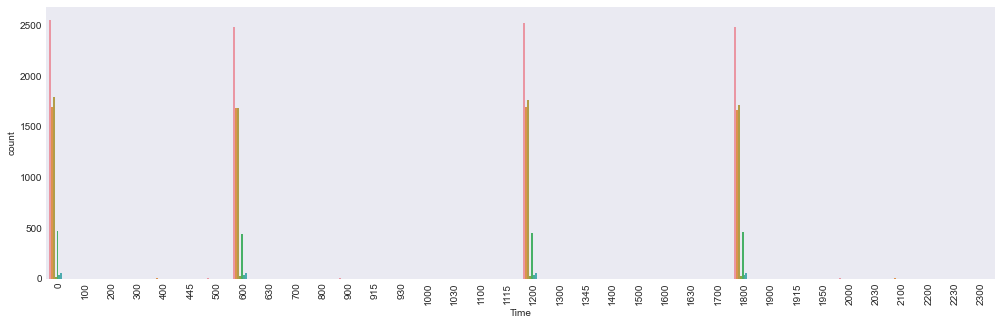

In [14]:
plt.figure(figsize=(17,5))
sns.countplot(pacific.Time, hue=pacific.Status)
plt.legend('')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Status', ylabel='Time'>

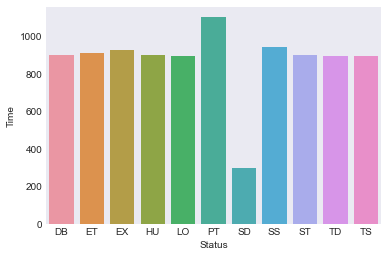

In [15]:
a = pacific.groupby(by='Status')['Time'].mean()
sns.barplot(x=a.index, y=a)

<Figure size 432x288 with 0 Axes>

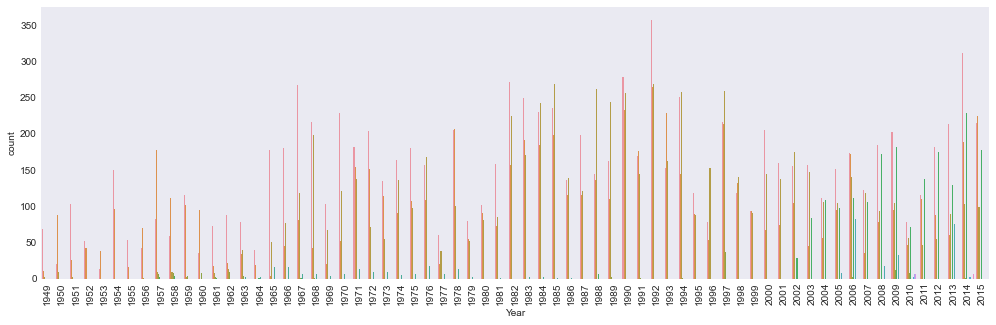

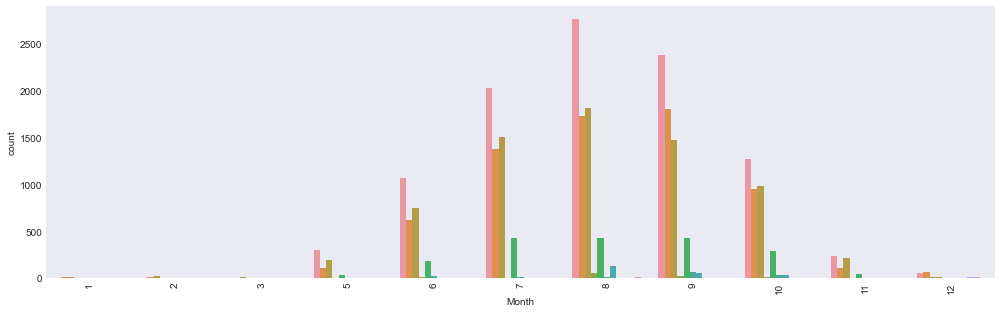

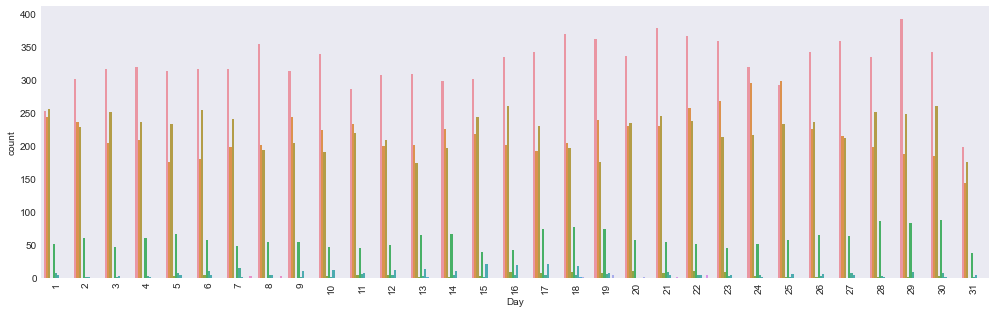

In [18]:
date = pd.to_datetime(pacific['Date'], format='%Y%m%d')
pacific['Year'] = pd.DatetimeIndex(date).year
pacific['Month'] = pd.DatetimeIndex(date).month
pacific['Day'] = pd.DatetimeIndex(date).day

cols = ['Year', 'Month', 'Day']
for i, col in enumerate(cols):
    plt.figure(i)
    plt.figure(figsize=(17,5))
    sns.countplot(x=col, hue='Status', data=pacific)
    plt.legend('')
    plt.xticks(rotation=90)

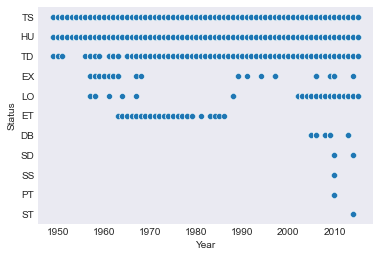

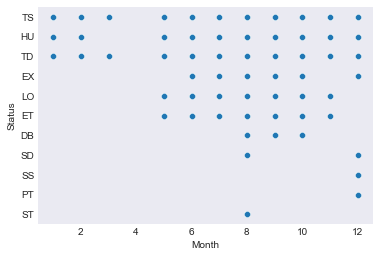

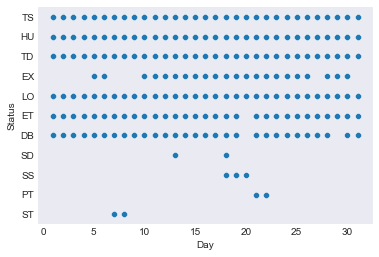

In [19]:
cols = ['Year', 'Month', 'Day']
for i, col in enumerate(cols):
    plt.figure(i)
    sns.scatterplot(pacific[col], pacific['Status'])

In [20]:
a = pacific['Latitude'].unique()[0]
str(a).replace('N', '')

'20.2'

In [21]:
directions =['N', 'S', 'E', 'W']
for dir_ in directions:
    pacific.loc[:,'Latitude'] = pacific['Latitude'].apply(lambda x : str(x).replace(dir_,''))
    pacific.loc[:,'Longitude'] = pacific['Longitude'].apply(lambda x : str(x).replace(dir_,''))

<AxesSubplot:xlabel='Latitude', ylabel='Density'>

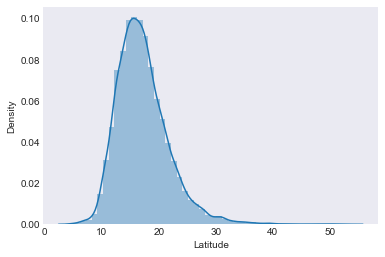

In [22]:
sns.distplot(pacific['Latitude'].astype('float'))

<AxesSubplot:xlabel='Longitude', ylabel='Density'>

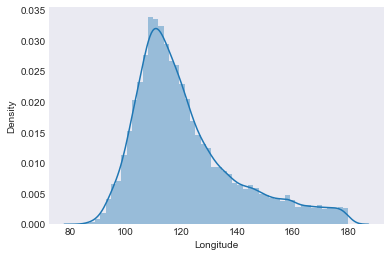

In [23]:
sns.distplot(pacific['Longitude'].astype('float'))

<AxesSubplot:xlabel='Maximum Wind', ylabel='Density'>

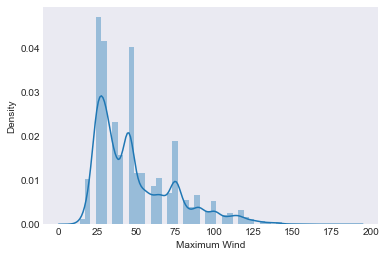

In [24]:
sns.distplot(pacific['Maximum Wind'])

In [25]:
features = ['Time', 'Status', 'Latitude', 'Longitude',
       'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW', 'Year', 'Month', 'Day']

label = 'Status'

In [26]:
from sklearn.preprocessing import LabelEncoder

y = pacific['Status']

le = LabelEncoder()
le.fit(y)
pacific.loc[:,'Status'] = le.transform(y)
print(le.classes_)

['DB' 'ET' 'EX' 'HU' 'LO' 'PT' 'SD' 'SS' 'ST' 'TD' 'TS']


In [27]:
X = pacific[features]
y = pacific[label]

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transfoX_pca.shaperm(X)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
print("---Explained Variance Ratio---")
print(pca.explained_variance_ratio_.sum()*100)
X_pca = pca.transform(X)

---Explained Variance Ratio---
97.35009848794411


In [30]:
X_pca.shape

(26137, 8)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   stratify = y,
                                                   test_size = 0.20)

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=30000).fit(X_train, y_train)



#Init
model_for_cv = model

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_for_cv, X_train, y_train, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\Ritik Roy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 0.89 (+/- 0.17)


In [36]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

model_for_cv = clf

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_for_cv, X_train, y_train, cv=5, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.11)


C:\Users\Ritik Roy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
